# Point cloud 

In [3]:
import laspy
import scipy
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

## Load point cloud

In [4]:
point_cloud = laspy.read("../_data/point_cloud/20180912_SN0330_FN0088_01.las")

In [5]:
# Cast to numpy
points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()

In [6]:
points.shape

(2392722, 3)

In [7]:
# Coordinates X, Y, Z
points[0]

array([5.20827903e+05, 5.41956772e+06, 4.10562919e+02])

In [8]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

In [7]:
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


## Decrease "resolution"


In [8]:
# Select every n (10) points
factor=10
decimated_points_random = points[::factor]
print("Number of RAW poinst : {pn}".format(pn=str(points.shape)))
print("Number of noRAW poinst: {pn}".format(pn=str(decimated_points_random.shape)))

Number of RAW poinst : (2392722, 3)
Number of noRAW poinst: (239273, 3)


In [9]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(decimated_points_random)
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


## Select/filter specify area

In [10]:
list(point_cloud.point_format)

[DimensionInfo(name='X', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None),
 DimensionInfo(name='Y', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None),
 DimensionInfo(name='Z', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None),
 DimensionInfo(name='intensity', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None),
 DimensionInfo(name='return_number', kind=<DimensionKind.BitField: 3>, num_bits=3, num_elements=1, is_standard=True, description='', offsets=None, scales=None),
 DimensionInfo(name='number_of_returns', kind=<DimensionKind.BitField: 3>, num_bits=3, num_elements=1, is_standard=True, description='', offsets=None, scales=None),
 DimensionInfo(name='scan_direction_flag', k

### From array

In [11]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[:150000])
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


KeyboardInterrupt: 

### By elevation

In [12]:
points_cut = points[:150000]
points_cut = points_cut[points_cut[:,2] > 400]
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points_cut)
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


### By ...

In [13]:
# points_cut = points[:150000]

slicer_0 = (max(points_cut[:,0]) + min(points_cut[:,0]))/2
points_cut = points_cut[points_cut[:,0] > slicer_0]

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points_cut)
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


### By time

In [19]:
print(min(point_cloud.gps_time))
print(max(point_cloud.gps_time))

1536741736.201407
1536741844.9271975


In [28]:
slicer_t = 1536741736 + 20
points_cut = points[point_cloud.gps_time < slicer_t]

In [29]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points_cut)
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


### By return number

In [30]:
from collections import Counter
print(Counter(point_cloud.return_number).keys()) # equals to list(set(words))
print(Counter(point_cloud.return_number).values()) # counts the elements' frequency

dict_keys([1, 2, 3])
dict_values([1940823, 387851, 64048])


In [31]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[point_cloud.return_number == 1])
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [32]:
print(Counter(point_cloud.number_of_returns).keys()) # equals to list(set(words))
print(Counter(point_cloud.number_of_returns).values()) # counts the elements' frequency

dict_keys([1, 2, 3])
dict_values([1552986, 647594, 192142])


In [33]:
np.where(point_cloud.number_of_returns == 3)

(array([     60,      61,      62, ..., 2392489, 2392490, 2392491]),)

In [34]:
point_number = 61
print(point_cloud.number_of_returns[point_number])
print(point_cloud.return_number[point_number])

3
2


In [35]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[(point_cloud.return_number == 3)])
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [36]:
# Without ground and cables
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[(point_cloud.number_of_returns == 3) & (point_cloud.return_number > 2)])
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [40]:
# Without ground and cables
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[(point_cloud.number_of_returns == 3) & (point_cloud.return_number > 2)])
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [53]:
# Without ground and cables
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[(point_cloud.number_of_returns >= 2) & (point_cloud.return_number == 1)])
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


#### By intensity

In [48]:
print(min(point_cloud.intensity))
print(max(point_cloud.intensity))

12
572


(array([5.18470e+04, 3.48375e+05, 1.28292e+06, 5.03524e+05, 1.50283e+05,
        4.52120e+04, 8.75200e+03, 1.61600e+03, 1.75000e+02, 1.80000e+01]),
 array([ 12.,  68., 124., 180., 236., 292., 348., 404., 460., 516., 572.]),
 <BarContainer object of 10 artists>)

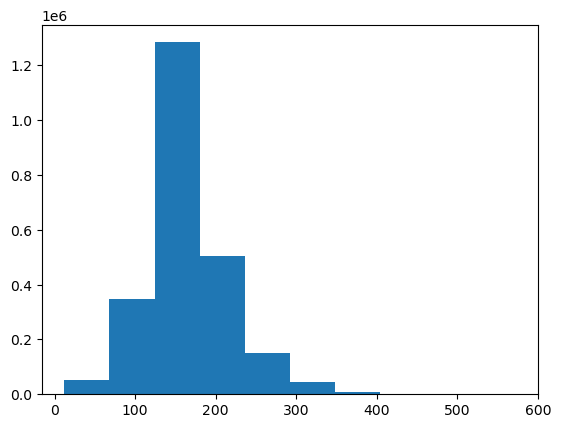

In [7]:
import matplotlib.pyplot as plt
plt.hist(point_cloud.intensity)

In [8]:
# Vedenie bez pody pod nim
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[(point_cloud.intensity < 50)])
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [ ]:
# KEY s

## Own clolor

In [11]:
# Vedenie bez pody pod nim


In [12]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.paint_uniform_color([0.55, 0.55, 0.55])
# [(point_cloud.number_of_returns >= 2) & (point_cloud.return_number == 1)]
for item in np.where(point_cloud.number_of_returns >= 2)[0]:
    pcd.colors[int(item)] = [1,0,0.5]
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


## Load point cloud

In [14]:
import laspy
import scipy
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

In [15]:
point_cloud = laspy.read("../_data/point_cloud/20_BanskaBystrica_19_341316_5383246_d_c_jtsk03_bpv_clip.las")

In [16]:
# Cast to numpy
points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()

In [17]:
points.shape

(818721, 3)

In [18]:
# Coordinates X, Y, Z
points[0]

array([-4.40001060e+05, -1.24467168e+06,  2.44000000e+02])

In [19]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [20]:
set(point_cloud.classification)

{1, 2, 3, 4, 5, 6, 7, 18}

### Selecet class

In [21]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[point_cloud.classification == 5])
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [22]:
pcd = o3d.geometry.PointCloud()

pcd.points = o3d.utility.Vector3dVector(points)
pcd.paint_uniform_color([0.5, 0.5, 0.5])

PointCloud with 818721 points.

In [23]:
for index in np.where(point_cloud.classification == 5)[0]:
    pcd.colors[index] = [1,0,0]

In [24]:
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [25]:
np.where(point_cloud.classification == 5)

(array([ 45339,  47052,  50772, ..., 811674, 811676, 811692]),)

### Filtering

In [26]:
def display_inlier_outlier(cloud, ind):
    inlier_cloud = cloud.select_by_index(ind)
    outlier_cloud = cloud.select_by_index(ind, invert=True)

    print("Showing outliers (red) and inliers (gray): ")
    outlier_cloud.paint_uniform_color([1, 0, 0])
    inlier_cloud.paint_uniform_color([0.8, 0.8, 0.8])
    o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])

In [29]:
pcd = o3d.geometry.PointCloud()

pcd.points = o3d.utility.Vector3dVector(points[point_cloud.classification == 5])
# downpcd = pcd.voxel_down_sample(voxel_size=0.02)

In [30]:
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [31]:
print("Radius oulier removal")

cl, ind = pcd.remove_radius_outlier(nb_points=20, radius=10)
# print(ind)
display_inlier_outlier(pcd, ind)

Radius oulier removal
Showing outliers (red) and inliers (gray): 
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [32]:
point_cloud.classification == 5

array([False, False, False, ..., False, False, False])

In [34]:
o3d.visualization.draw_geometries([cl])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [35]:
point_cloud

<LasData(1.4, point fmt: <PointFormat(6, 0 bytes of extra dims)>, 818721 points, 4 vlrs)>

### Clustering

In [36]:
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(
        cl.cluster_dbscan(eps=4, min_points=20, print_progress=True))

[Open3D DEBUG] Precompute neighbors.
Precompute neighbors.[================>           [Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 79
Precompute neighbors.[========================================] 100%


In [37]:
max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
cl.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([cl])

point cloud has 79 clusters
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [38]:
from collections import Counter
Counter(labels)

Counter({0: 1975,
         1: 53,
         -1: 272,
         3: 18,
         2: 41,
         4: 39,
         5: 24,
         6: 43,
         7: 30,
         8: 206,
         9: 450,
         10: 335,
         11: 259,
         12: 497,
         13: 497,
         14: 381,
         15: 34,
         16: 35,
         35: 121,
         17: 431,
         18: 52,
         19: 4940,
         20: 233,
         21: 41,
         22: 1355,
         23: 47,
         24: 70,
         25: 43,
         26: 424,
         27: 20,
         28: 32,
         29: 73,
         30: 311,
         31: 22,
         32: 62,
         33: 62,
         34: 45,
         36: 251,
         37: 218,
         38: 1551,
         39: 3605,
         40: 380,
         41: 86,
         42: 28,
         43: 207,
         44: 97,
         45: 1723,
         46: 1795,
         47: 442,
         48: 81,
         49: 82,
         50: 129,
         51: 65,
         52: 658,
         53: 400,
         54: 60,
         55: 192,
     